In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
import sklearn as sk
from sklearn.preprocessing import MaxAbsScaler



In [2]:
stock = pd.read_csv("INfy.NS.csv")
stock = pd.read_csv("TATASTEEL.NS.csv")

stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,58.850540,62.880619,58.774323,61.908825,20.878571,297646061
1,2010-01-08,62.023155,63.023529,58.593304,61.708752,20.811098,405465824
2,2010-01-15,61.927879,62.832981,60.093864,61.737335,20.820736,357948402
3,2010-01-22,61.079945,61.079945,52.710155,55.773201,18.809347,394622084
4,2010-01-29,55.068176,57.507183,52.562481,55.039597,18.561945,458531885


In [3]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
517,2019-11-29,42.744999,42.950001,38.900002,39.980000,16.943535,750639160
518,2019-12-06,40.145000,42.090000,39.384998,41.869999,17.744514,618116530
519,2019-12-13,43.025002,45.480000,42.014999,44.674999,18.933273,1225274360
520,2019-12-20,44.599998,47.200001,44.310001,46.790001,19.829611,750535130
521,2019-12-27,46.924999,47.630001,46.320000,47.205002,20.005489,322505520


In [4]:
stock = stock.reset_index()
stock.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-01,58.850540,62.880619,58.774323,61.908825,20.878571,297646061
1,1,2010-01-08,62.023155,63.023529,58.593304,61.708752,20.811098,405465824
2,2,2010-01-15,61.927879,62.832981,60.093864,61.737335,20.820736,357948402
3,3,2010-01-22,61.079945,61.079945,52.710155,55.773201,18.809347,394622084
4,4,2010-01-29,55.068176,57.507183,52.562481,55.039597,18.561945,458531885


In [5]:
stock = stock.drop(['Date','Adj Close'], axis = 1)
stock.head()

,index,Open,High,Low,Close,Volume
0,0,58.850540,62.880619,58.774323,61.908825,297646061
1,1,62.023155,63.023529,58.593304,61.708752,405465824
2,2,61.927879,62.832981,60.093864,61.737335,357948402
3,3,61.079945,61.079945,52.710155,55.773201,394622084
4,4,55.068176,57.507183,52.562481,55.039597,458531885


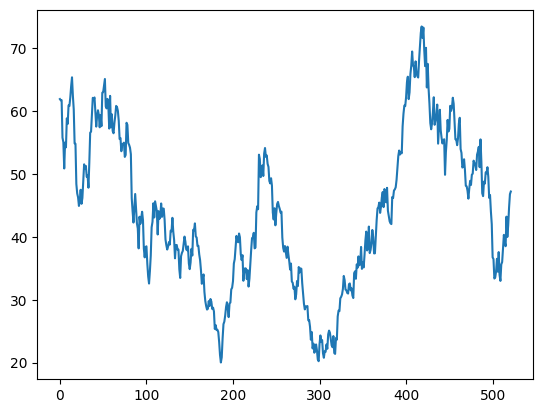

In [6]:
plt.plot(stock.Close)

In [7]:
stock

,index,Open,High,Low,Close,Volume
0,0,58.850540,62.880619,58.774323,61.908825,297646061
1,1,62.023155,63.023529,58.593304,61.708752,405465824
2,2,61.927879,62.832981,60.093864,61.737335,357948402
3,3,61.079945,61.079945,52.710155,55.773201,394622084
4,4,55.068176,57.507183,52.562481,55.039597,458531885
...,...,...,...,...,...,...
517,517,42.744999,42.950001,38.900002,39.980000,750639160
518,518,40.145000,42.090000,39.384998,41.869999,618116530
519,519,43.025002,45.480000,42.014999,44.674999,1225274360
520,520,44.599998,47.200001,44.310001,46.790001,750535130


In [8]:
ma100 = stock.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
517    52.004229
518    51.688417
519    51.418947
520    51.154050
521    50.929350
Name: Close, Length: 522, dtype: float64

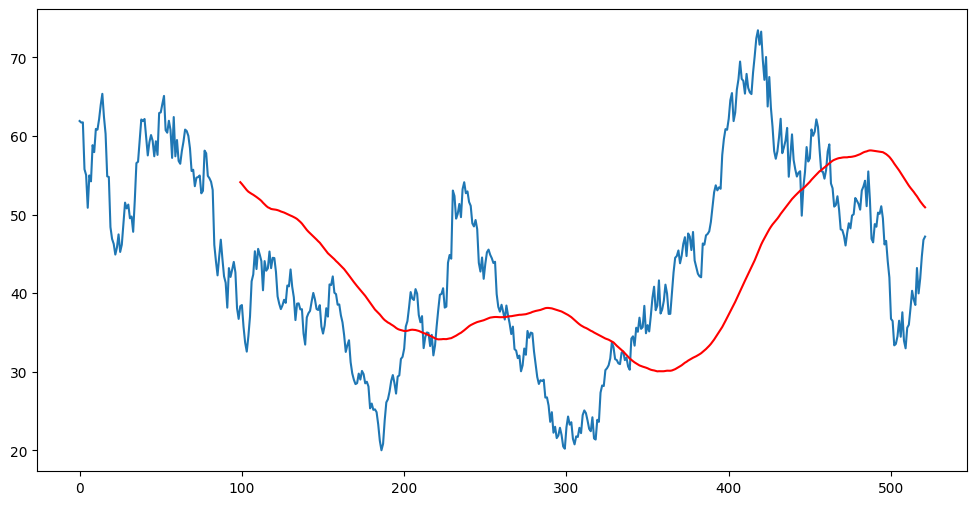

In [9]:
plt.figure(figsize = (12,6))
plt.plot(stock.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = stock.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
517    48.350768
518    48.453173
519    48.557051
520    48.672790
521    48.772074
Name: Close, Length: 522, dtype: float64

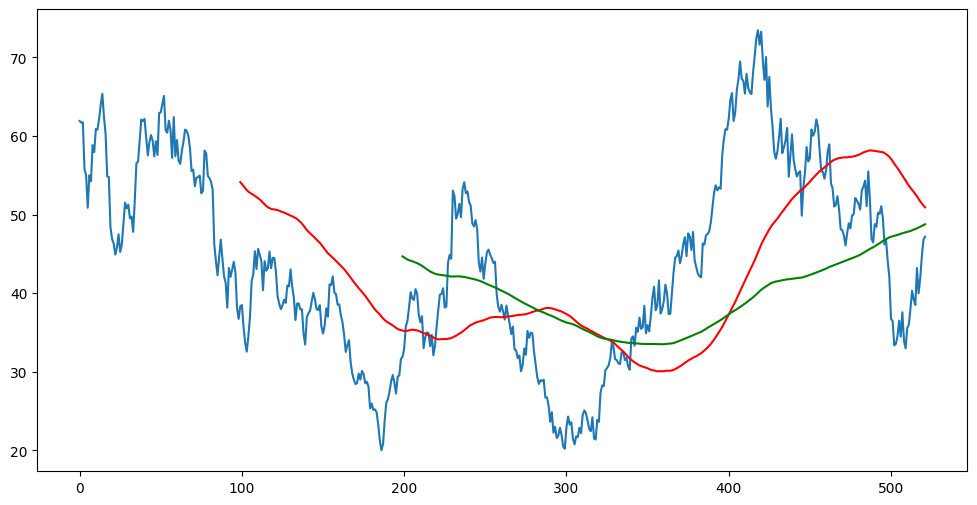

In [11]:
plt.figure(figsize = (12,6))
plt.plot(stock.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
stock.shape

(522, 6)

In [13]:
#splitting data into training and testing
data_train = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])
data_test = pd.DataFrame(stock['Close'][int(len(stock)*0.70):int(len(stock))])



print(data_train.shape)
print(data_test.shape)

(365, 1)
(157, 1)


In [14]:
data_train.head()

,Close
0,61.908825
1,61.708752
2,61.737335
3,55.773201
4,55.039597


In [15]:
data_test.head()

,Close
365,39.948246
366,42.639729
367,44.507092
368,44.730984
369,45.440773


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [17]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.92373138],
       [0.91931919],
       [0.91994953],
       [0.78842305],
       [0.77224496],
       [0.68032349],
       [0.77108932],
       [0.75449091],
       [0.85597218],
       [0.83653733],
       [0.90146017],
       [0.89935915],
       [0.92877393],
       [0.96879916],
       [1.        ],
       [0.93528723],
       [0.88769821],
       [0.76846302],
       [0.76678219],
       [0.62611611],
       [0.59291941],
       [0.57915745],
       [0.54900716],
       [0.56896729],
       [0.60563079],
       [0.55646596],
       [0.57695128],
       [0.63578099],
       [0.69482087],
       [0.6785376 ],
       [0.68935804],
       [0.65090862],
       [0.65584612],
       [0.61287943],
       [0.70154423],
       [0.80575688],
       [0.80932866],
       [0.86847353],
       [0.92803858],
       [0.92352132],
       [0.92940427],
       [0.87876866],
       [0.82718767],
       [0.86427139],
       [0.88433649],
       [0.86836845],
       [0.82477142],
       [0.866

In [18]:
data_train_array.shape

(365, 1)

In [19]:
x_train =[]
y_train =[]

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])
    
x_train, y_train =np.array(x_train), np.array(y_train)   
    

In [20]:
x_train.shape

(265, 100, 1)

In [21]:
#ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
9/9 [==============================] - 22s 394ms/step - loss: 0.0856
Epoch 2/50
9/9 [==============================] - 3s 291ms/step - loss: 0.0303
Epoch 3/50
9/9 [==============================] - 3s 283ms/step - loss: 0.0263
Epoch 4/50
9/9 [==============================] - 3s 280ms/step - loss: 0.0238
Epoch 5/50
9/9 [==============================] - 3s 289ms/step - loss: 0.0244
Epoch 6/50
9/9 [==============================] - 3s 280ms/step - loss: 0.0246
Epoch 7/50
9/9 [==============================] - 3s 287ms/step - loss: 0.0230
Epoch 8/50
9/9 [==============================] - 3s 281ms/step - loss: 0.0201
Epoch 9/50
9/9 [==============================] - 3s 280ms/step - loss: 0.0202
Epoch 10/50
9/9 [==============================] - 3s 282ms/step - loss: 0.0186
Epoch 11/50
9/9 [==============================] - 3s 305ms/step - loss: 0.0171
Epoch 12/50
9/9 [==============================] - 3s 357ms/step - loss: 0.0157
Epoch 13/50
9/9 [==============================]

In [26]:
model.save('keras_model.h5')

In [27]:
data_test.head()


,Close
365,39.948246
366,42.639729
367,44.507092
368,44.730984
369,45.440773


In [28]:
#data_train.tail(100)

In [29]:
past_100_days = data_train.tail(100)

In [30]:

final_stock = pd.concat([past_100_days, data_test]) ['Close']


In [31]:
final_stock.head()

265    36.132538
266    34.803471
267    35.751442
268    32.888470
269    32.702686
Name: Close, dtype: float64

In [32]:
import numpy as np
final_stock = np.array(final_stock).reshape(-1,1)
input_data = scaler.fit_transform(final_stock)
input_data


array([[0.2989082 ],
       [0.27393954],
       [0.2917487 ],
       [0.23796316],
       [0.23447291],
       [0.21648469],
       [0.22257026],
       [0.18498302],
       [0.19939145],
       [0.23948454],
       [0.22453911],
       [0.28136748],
       [0.26507962],
       [0.27751921],
       [0.27590839],
       [0.232683  ],
       [0.20127081],
       [0.17146949],
       [0.15473419],
       [0.16368353],
       [0.16189369],
       [0.16484695],
       [0.12215858],
       [0.12269554],
       [0.10318597],
       [0.06425631],
       [0.08725614],
       [0.03821369],
       [0.05244318],
       [0.02532668],
       [0.03132273],
       [0.05002685],
       [0.03266513],
       [0.00519065],
       [0.        ],
       [0.05110078],
       [0.07696439],
       [0.05754431],
       [0.06327191],
       [0.02353681],
       [0.01038126],
       [0.02953285],
       [0.02801148],
       [0.04993739],
       [0.0371398 ],
       [0.08027568],
       [0.09146233],
       [0.085

In [33]:
input_data.shape

(257, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(157, 100, 1)
(157,)


In [36]:
#Making Predictions

y_predicted = model.predict(x_test)

5/5 [==============================] - 2s 118ms/step


In [37]:
y_predicted.shape

(157, 1)

In [38]:
y_test

array([0.37059242, 0.42115627, 0.45623769, 0.46044386, 0.47377839,
       0.4431716 , 0.4612493 , 0.48952925, 0.50545908, 0.46035434,
       0.51440842, 0.50698046, 0.47476287, 0.51798817, 0.44979411,
       0.43341682, 0.41811349, 0.41202789, 0.40970108, 0.49042421,
       0.48764992, 0.50993379, 0.513245  , 0.51959907, 0.54188294,
       0.5777698 , 0.61285122, 0.62949706, 0.61741544, 0.62466437,
       0.62117414, 0.7018077 , 0.73948447, 0.76382672, 0.76212632,
       0.78852694, 0.83309468, 0.84991938, 0.78297833, 0.80320383,
       0.85797384, 0.88285301, 0.92527295, 0.88392698, 0.8790943 ,
       0.8485771 , 0.89574013, 0.86253805, 0.85153028, 0.84750313,
       0.89914079, 0.93789146, 0.98084833, 1.        , 0.96563452,
       0.99677821, 0.92905744, 0.8815272 , 0.93619629, 0.81784066,
       0.88829038, 0.81474085, 0.76937117, 0.71141449, 0.69290968,
       0.71056906, 0.74429106, 0.78853353, 0.70634211, 0.71996237,
       0.73630677, 0.76664711, 0.64998228, 0.70155151, 0.75124

In [39]:
y_predicted

array([[0.37515518],
       [0.3717685 ],
       [0.37033755],
       [0.3735429 ],
       [0.38235363],
       [0.39630914],
       [0.41258064],
       [0.4286346 ],
       [0.44331846],
       [0.456323  ],
       [0.46579957],
       [0.4723329 ],
       [0.476451  ],
       [0.4775016 ],
       [0.47667667],
       [0.47293013],
       [0.4655251 ],
       [0.45444337],
       [0.44055322],
       [0.42531028],
       [0.4125056 ],
       [0.40483668],
       [0.40407515],
       [0.41022444],
       [0.4219654 ],
       [0.4377665 ],
       [0.4567156 ],
       [0.47841856],
       [0.5020263 ],
       [0.5251398 ],
       [0.54533845],
       [0.56052417],
       [0.5726865 ],
       [0.5847571 ],
       [0.5987321 ],
       [0.6141864 ],
       [0.63025975],
       [0.6470473 ],
       [0.6640999 ],
       [0.6767433 ],
       [0.68280876],
       [0.6842295 ],
       [0.68403053],
       [0.68574774],
       [0.68883455],
       [0.6915473 ],
       [0.6912341 ],
       [0.688

In [40]:
scaler.scale_

array([0.01878661])

In [41]:
scale_factor = 1/0.00257832
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

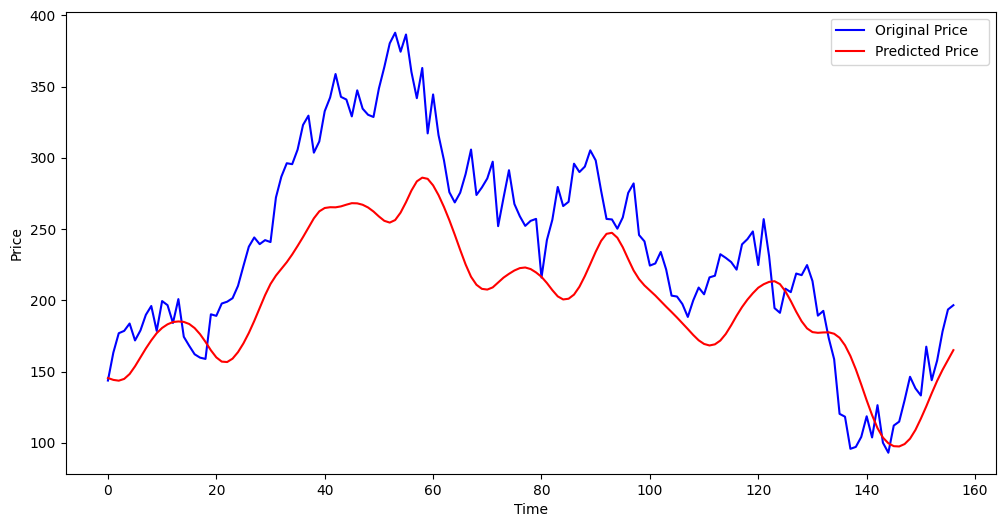

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()